# Introduction

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

DATASET [CLICK HERE](https://www.kaggle.com/datasets/brendan45774/test-file)

## 1. Importing Required libraries

This step involves importing various libraries that will be used throughout the data analysis and machine learning process. Here's a brief explanation of each:

1. **pandas (pd)**: A powerful library for data manipulation and analysis. It provides data structures like DataFrames that are used to store and manipulate tabular data.

2. **numpy (np)**: A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

3. **seaborn (sns)**: A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. **matplotlib.pyplot (plt)**: A plotting library for creating static, animated, and interactive visualizations in Python. It is often used alongside seaborn for data visualization.

5. **LabelEncoder**: A utility class in scikit-learn used to encode categorical labels as integer numbers.

6. **StandardScaler**: A preprocessing module in scikit-learn used to standardize features by removing the mean and scaling to unit variance.

7. **train_test_split**: A function in scikit-learn used to split arrays or matrices into random train and test subsets.

8. **SimpleImputer**: A class in scikit-learn used to impute missing values in datasets.

9. **RandomForestClassifier**: A class in scikit-learn that implements a random forest classifier, which is an ensemble learning method for classification.

10. **classification_report**: A function in scikit-learn used to build a text report showing the main classification metrics.

11. **confusion_matrix**: A function in scikit-learn used to compute confusion matrix to evaluate the accuracy of a classification.

12. **accuracy_score**: A function in scikit-learn used to calculate the accuracy of the classification model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 2. Load and Inspect the Data

This step involves loading a dataset from a CSV file and inspecting its contents:

1. **Load the data**:
   - `df = pd.read_csv('/content/tested.csv')`: This loads the data from a CSV file located at '/content/tested.csv' into a pandas DataFrame named 'df'.

2. **Display the first few rows**:
   - `df.head()`: This displays the first few rows of the DataFrame 'df', allowing you to inspect the dataset's structure and contents.

In [2]:
# Load the data
df = pd.read_csv('/content/tested.csv')

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


This data represents a sample of the Titanic dataset, which includes information about passengers. Here's an explanation of each column:

- **PassengerId**: A unique identifier for each passenger.
- **Survived**: Indicates if the passenger survived (1) or not (0).
- **Pclass**: The ticket class of the passenger (1st, 2nd, or 3rd class).
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Age**: The age of the passenger.
- **SibSp**: The number of siblings or spouses aboard the Titanic.
- **Parch**: The number of parents or children aboard the Titanic.
- **Ticket**: The ticket number.
- **Fare**: The fare paid by the passenger.
- **Cabin**: The cabin number.
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Each row in the dataset represents a different passenger, and each column provides specific information about that passenger. This dataset is often used for predictive modeling to determine factors that influenced a passenger's likelihood of survival during the Titanic disaster.

## 3. Check Data Types and Missing Values

This step involves checking the data types of each column and identifying missing values in the dataset:

1. **Check data types**:
   - `df.info()`: This method provides a concise summary of the DataFrame, including the data types of each column. It's useful for quickly understanding the structure of the dataset and identifying any potential data type issues.

2. **Check for missing values**:
   - `df.isnull().sum()`: This method calculates the sum of missing values in each column of the DataFrame. It helps identify columns with missing data, which may need to be addressed before further analysis or modeling.

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


This is the output of `df.info()` for the Titanic dataset:

- **RangeIndex**: Indicates that the DataFrame has 418 entries, ranging from index 0 to index 417.
- **Data columns**: Describes the columns in the DataFrame.
- **Total columns**: Specifies that there are 12 columns in total.
- **Non-Null Count**: Shows the number of non-null values in each column.
- **Dtype**: Specifies the data type of each column.

From this output, we can infer the following about the dataset:

1. **PassengerId, Survived, Pclass, SibSp, Parch**: These columns are integers and have no missing values.
2. **Name, Sex, Ticket, Cabin, Embarked**: These columns are objects (strings) and have no missing values except for the "Cabin" column, which has many missing values.
3. **Age, Fare**: These columns are floats and have some missing values, particularly the "Age" column.
4. **Memory usage**: Indicates the memory usage of the DataFrame.

Overall, this information provides a summary of the dataset's structure, including the number of entries, the data types of each column, and the presence of missing values.

In [4]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

This output shows the number of missing values (null values) in each column of the dataset:

- **PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Embarked**: These columns have no missing values, as indicated by 0 in the output.

- **Age**: This column has 86 missing values.

- **Fare**: This column has 1 missing value.

- **Cabin**: This column has 327 missing values.

Missing values can impact the analysis and modeling process, and it's important to handle them appropriately, such as by imputing missing values or removing rows/columns with too many missing values.

## 4. Summary Statistics

This step involves generating summary statistics for both numerical and categorical columns in the dataset:

1. **Summary statistics for numerical columns**:
   - `df.describe()`: This method calculates and displays summary statistics for numerical columns, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values. These statistics provide insights into the central tendency, dispersion, and distribution of numerical data.

2. **Summary statistics for categorical columns**:
   - `df.describe(include=['O'])`: This method calculates and displays summary statistics for categorical columns, including count, unique, top (most frequent value), and frequency of the top value. These statistics provide insights into the distribution of categorical data. The `include=['O']` argument specifies that only object (categorical) columns should be included in the summary statistics.

In [5]:
# Summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


This output shows the summary statistics for the numerical columns in the dataset:

- **PassengerId, Survived, Pclass, SibSp, Parch**: These columns are categorical in nature but are treated as numerical because they represent categories or counts.

- **Age**: This column has 418 non-null values with a mean of approximately 30.27, a standard deviation of approximately 14.18, and values ranging from 0.17 to 76.00. The median (50th percentile) age is 27.00, with 25% of passengers being younger than 21.00 and 75% being younger than 39.00.

- **Fare**: This column has 417 non-null values with a mean of approximately 35.63, a standard deviation of approximately 55.91, and values ranging from 0.00 to 512.33. The median fare is 14.45, with 25% of passengers paying less than 7.90 and 75% paying less than 31.50.

These statistics provide insights into the distribution and central tendency of numerical data in the dataset.

In [6]:
# Summary statistics for categorical columns
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


This output shows the summary statistics for the categorical columns in the dataset:

- **Name**: This column has 418 unique values, indicating that each passenger has a unique name. The most frequent name is "Kelly, Mr. James," which appears once in the dataset.

- **Sex**: This column has 2 unique values, "male" and "female." The most frequent value is "male," which appears 266 times in the dataset.

- **Ticket**: This column has 363 unique values. The most frequent ticket number is "PC 17608," which appears 5 times in the dataset.

- **Cabin**: This column has 76 unique values, indicating that there are 76 different cabin numbers. The most frequent cabins are "B57 B59 B63 B66," which appear 3 times in the dataset.

- **Embarked**: This column has 3 unique values, "S," "C," and "Q," representing the ports of embarkation (Southampton, Cherbourg, and Queenstown, respectively). The most frequent port is "S," which appears 270 times in the dataset.

These statistics provide insights into the distribution and frequency of categorical data in the dataset.

## 5. EDA (Exploratory Data Analysis)
Exploratory Data Analysis is a crucial step in data analysis that involves exploring and summarizing the main characteristics of a dataset. This process helps in understanding the data, identifying patterns, and checking assumptions before applying more complex statistical analyses.

### 5.1 Univariate Analysis

This step involves conducting univariate analysis on the dataset, focusing on both numerical and categorical features:

1. **Histograms for numerical features**:
   - `df[numerical_features].hist(bins=15, figsize=(15, 10))`: This creates histograms for numerical features ('Age', 'Fare', 'SibSp', 'Parch') with 15 bins each and a figure size of 15x10 inches. Histograms are useful for visualizing the distribution of numerical data.

2. **Bar plots for categorical features**:
   - `categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']`: This defines a list of categorical features to analyze.
   - `fig, axes = plt.subplots(2, 2, figsize=(15, 10))`: This creates a 2x2 grid of subplots for the bar plots.
   - `for i, col in enumerate(categorical_features):`: This loops through each categorical feature and its corresponding subplot.
   - `sns.countplot(x=df[col], ax=axes[i//2, i%2])`: This creates a count plot for each categorical feature, showing the frequency of each category. The `ax` argument specifies the subplot to use.
   - `plt.tight_layout()`: This adjusts the spacing between subplots to prevent overlap.
   
These visualizations provide insights into the distribution of numerical features and the frequency of different categories in categorical features, helping to understand the dataset's characteristics and potentially identify patterns or trends.



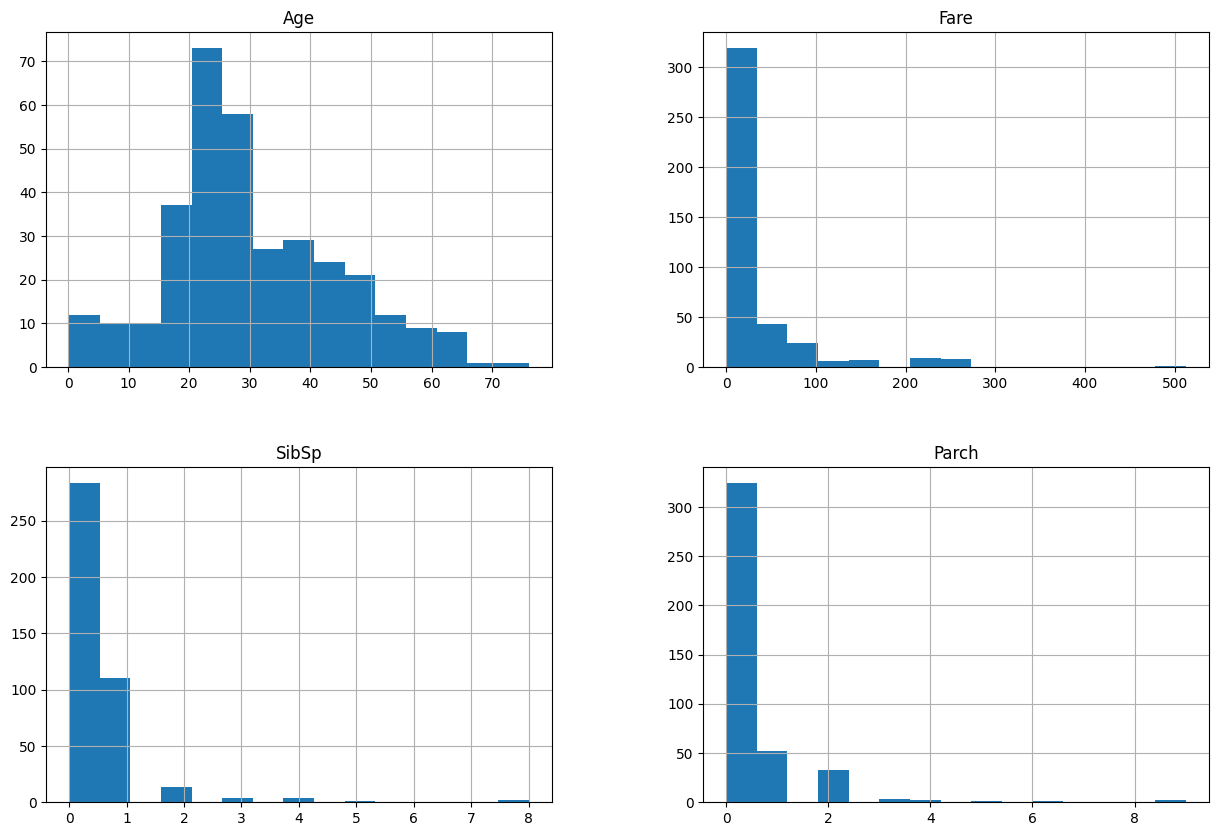

In [7]:
# Histograms for numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.show()

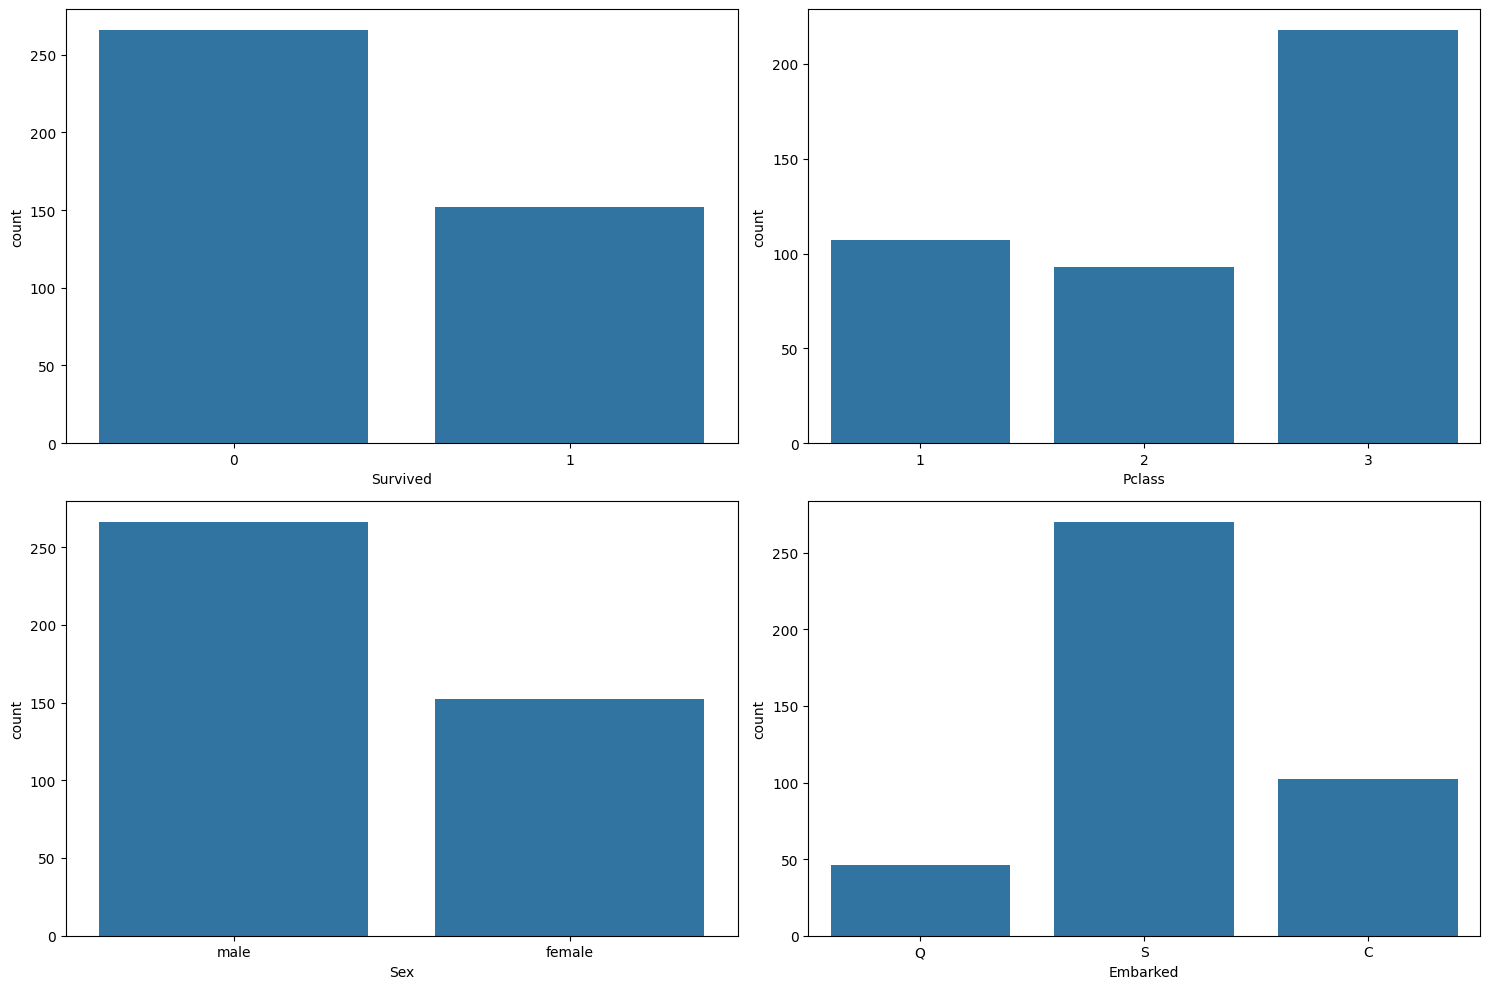

In [8]:
# Bar plots for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(categorical_features):
    sns.countplot(x=df[col], ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

### 5.2 Bivariate Analysis

This step involves conducting bivariate analysis on the dataset, examining the relationships between two variables:

1. **Boxplots for categorical vs. numerical features**:
   - `fig, axes = plt.subplots(2, 2, figsize=(15, 10))`: This creates a 2x2 grid of subplots for the boxplots.
   - `for i, col in enumerate(numerical_features):`: This loops through each numerical feature to create a boxplot for its relationship with the 'Survived' variable.
   - `sns.boxplot(x='Survived', y=col, data=df, ax=axes[i//2, i%2])`: This creates a boxplot for each numerical feature, comparing the distribution of values between passengers who survived (Survived=1) and those who did not (Survived=0).

2. **Cross-tabulations for categorical features**:
   - `for col in categorical_features[1:]:`: This loops through each categorical feature (excluding 'Survived') to create a cross-tabulation with the 'Survived' variable.
   - `sns.countplot(x=col, hue='Survived', data=df)`: This creates a count plot for each categorical feature, showing the count of passengers who survived and did not survive for each category.

3. **Correlation heatmap**:
   - `correlation_matrix = df[numerical_features].corr()`: This calculates the correlation matrix for the numerical features.
   - `sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')`: This creates a heatmap to visualize the correlation matrix, with annotations showing the correlation coefficients between pairs of numerical features. The colormap 'coolwarm' is used to indicate the strength and direction of correlations.

These visualizations help to explore relationships between variables, identify patterns, and understand how different features may be related to the target variable ('Survived' in this case).

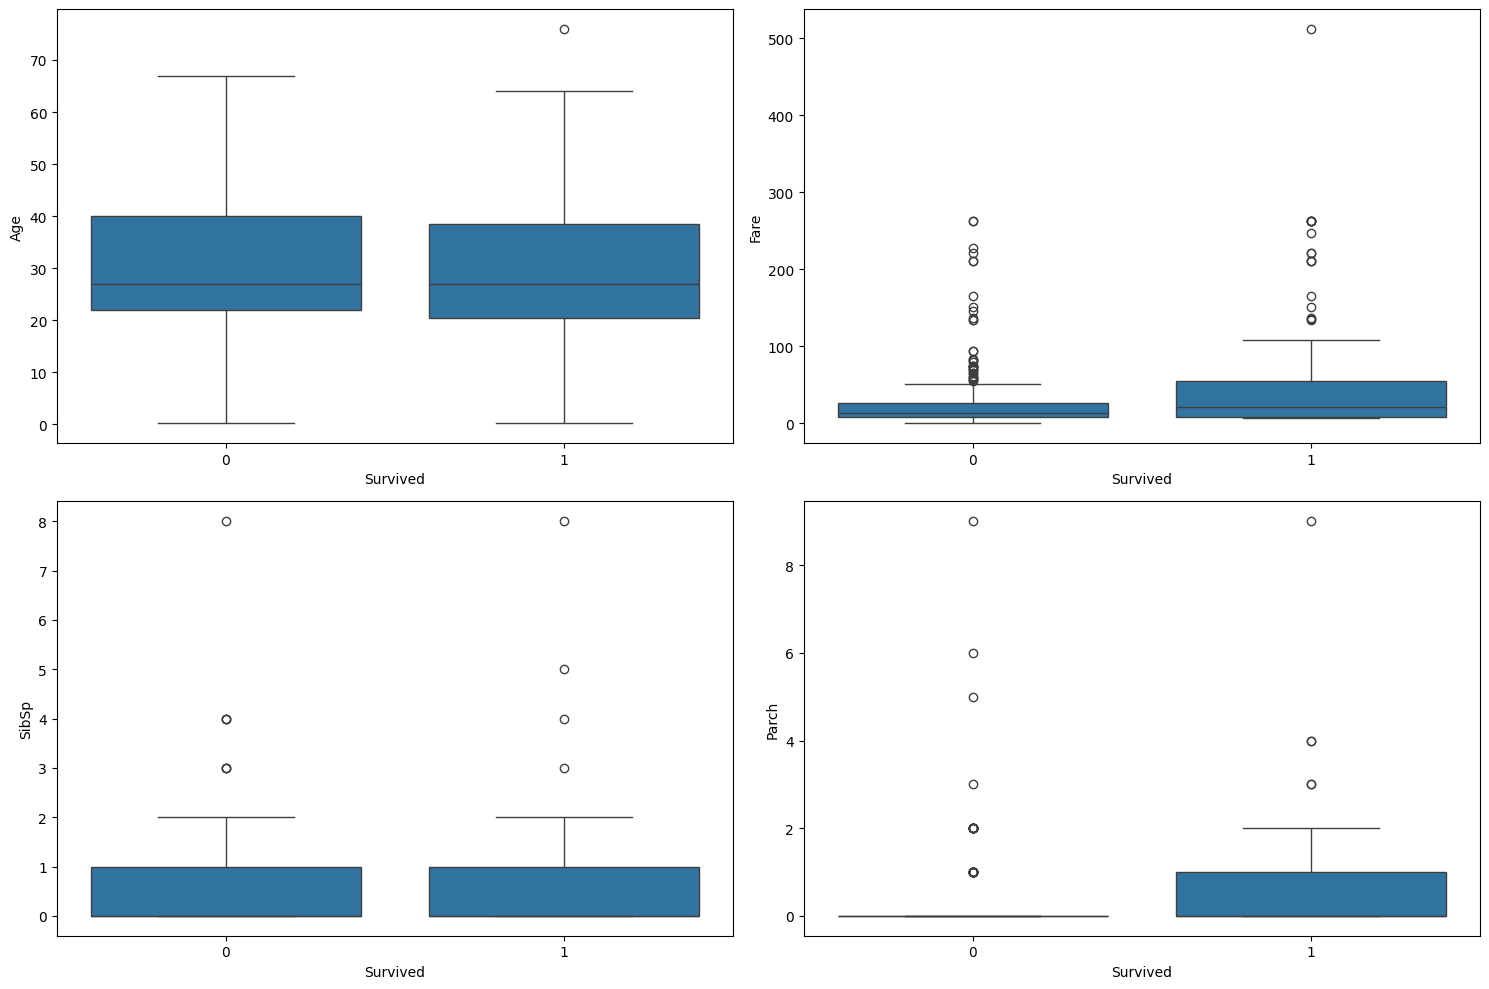

In [9]:
# Boxplots for categorical vs. numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numerical_features):
    sns.boxplot(x='Survived', y=col, data=df, ax=axes[i//2, i%2])
plt.tight_layout()
plt.show()

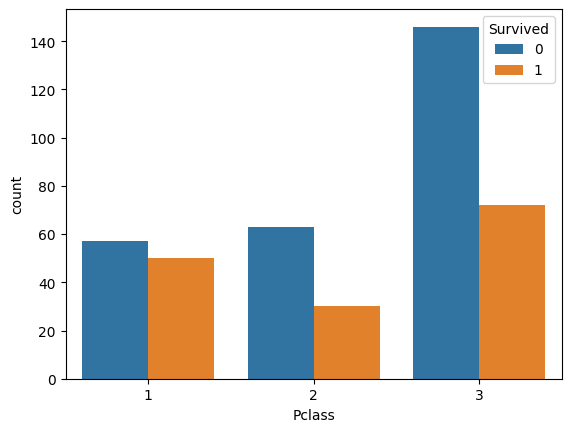

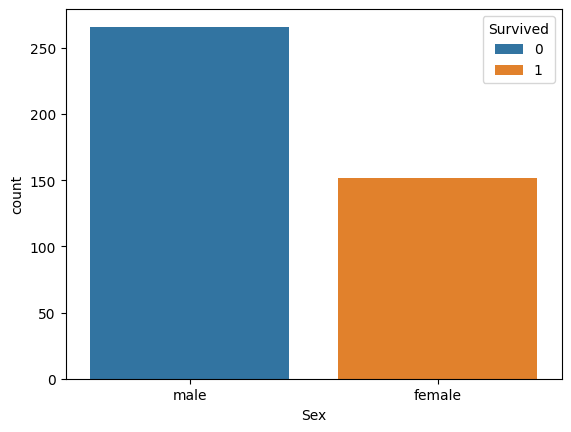

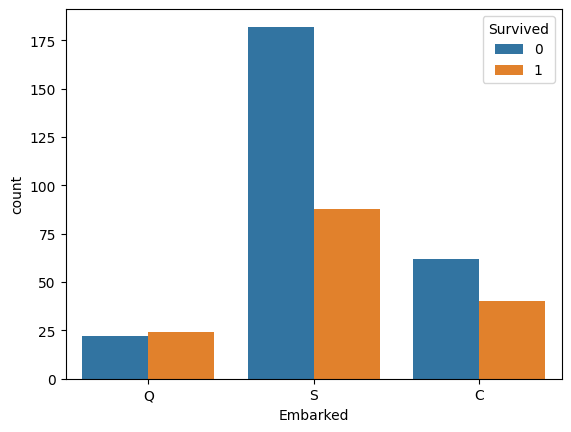

In [10]:
# Cross-tabulations for categorical features
for col in categorical_features[1:]:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.show()

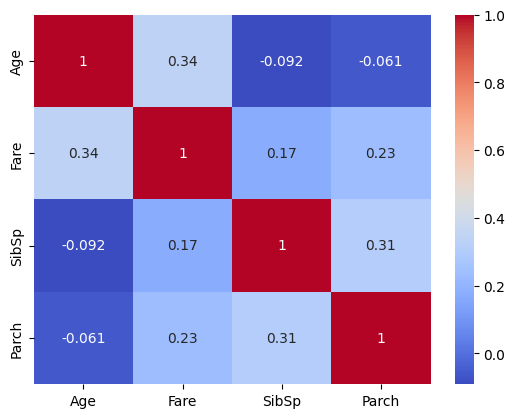

In [11]:
# Correlation heatmap
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 5.3 Handle Missing Values

This step involves handling missing values in the dataset:

1. **Fill missing values**:
   - `df['Age'].fillna(df['Age'].median(), inplace=True)`: This fills missing values in the 'Age' column with the median age of passengers.
   - `df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)`: This fills missing values in the 'Embarked' column with the most frequent port of embarkation.
   
2. **Drop column**:
   - `df.drop(columns=['Cabin'], inplace=True)`: This drops the 'Cabin' column from the dataset due to a large number of missing values.

3. **Verify missing values**:
   - `df.isnull().sum()`: This checks if there are any remaining missing values in the dataset after handling them. The output should show 0 missing values for all columns.

These steps ensure that missing values are appropriately addressed, either by filling them with suitable values or by removing columns with too many missing values, to prepare the dataset for further analysis or modeling.

In [12]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' due to many missing values

# Verify missing values are handled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### 5.4 Feature Engineering

This step involves creating new features through feature engineering:

1. **Create a 'FamilySize' feature**:
   - `df['FamilySize'] = df['SibSp'] + df['Parch'] + 1`: This calculates the total family size for each passenger by adding the number of siblings/spouses ('SibSp') and the number of parents/children ('Parch') and adding 1 for the passenger themselves.

2. **Create an 'IsAlone' feature**:
   - `df['IsAlone'] = (df['FamilySize'] == 1).astype(int)`: This creates a binary feature indicating whether a passenger is traveling alone (IsAlone=1) or with family (IsAlone=0). It checks if the 'FamilySize' is equal to 1 and converts the result to an integer (1 for True, 0 for False).

These new features provide additional information about each passenger's family size and whether they are traveling alone, which could be useful in predicting survival outcomes or other analysis.

In [13]:
# Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create an 'IsAlone' feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,0


## 6. Preprocess the Data

This step preprocesses the data for machine learning:

1. **Encode 'Sex' column**: Convert categorical values to numerical using `LabelEncoder`.
2. **One-hot encode 'Embarked' column**: Create dummy variables for 'Embarked' categories.
3. **Drop unnecessary columns**: Remove 'Name', 'Ticket', and 'PassengerId'.
4. **Identify numerical features**: Select 'Age', 'Fare', and 'FamilySize'.
5. **Initialize and scale**: Standardize numerical features using `StandardScaler`.

These steps prepare the data for model training by converting categorical data into a numerical format and standardizing numerical features.

In [14]:
# Encode 'Sex' column
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [15]:
# Identify numerical features
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## 7. Split the Data

This step involves splitting the dataset into training and testing sets, handling missing values, and preparing the data for training a machine learning model. Here's an explanation of each part:

1. **Define features (X) and target (y)**:
   - **X**: This is the feature matrix that contains all the input features used to predict the target variable.
   - **y**: This is the target vector that contains the values we want to predict.

2. **Split the data**:
   - `train_test_split(X, y, test_size=0.2, random_state=42)`: This function splits the dataset into training and testing sets. The `test_size=0.2` argument specifies that 20% of the data should be used for testing, while the rest is used for training. The `random_state=42` argument ensures that the data is split in a reproducible manner.

3. **Initialize the imputer for numerical features**:
   - `num_imputer = SimpleImputer(strategy='median')`: This initializes a SimpleImputer object with a strategy of using the median value to impute missing numerical values.

4. **Apply the imputer to numerical features**:
   - `X_train[numerical_features] = num_imputer.fit_transform(X_train[numerical_features])`: This applies the imputer to the training set's numerical features, replacing missing values with the median of each column.
   - `X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])`: This applies the same imputer (fitted on the training set) to the test set's numerical features. It's important to use `transform` on the test set to ensure consistency with the training set.

5. **Check for remaining NaNs**:
   - `print(X_train.isnull().sum())` and `print(X_test.isnull().sum())`: These statements print the number of NaN values in each column of the training and test sets, respectively, after imputation. This is to ensure that all missing values have been properly handled.

This process prepares the data for training a machine learning model by ensuring that all features are numerical and that there are no missing values, which is necessary for most machine learning algorithms to work properly.

In [16]:
# Define features (X) and target (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the imputer for numerical features
num_imputer = SimpleImputer(strategy='median')

# Apply the imputer to numerical features
X_train[numerical_features] = num_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = num_imputer.transform(X_test[numerical_features])

# Check if there are any remaining NaNs
print(X_train.isnull().sum())
print(X_test.isnull().sum())


Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
Embarked_Q    0
Embarked_S    0
dtype: int64


## 8. Build and Evaluate a Machine Learning Model

This step involves building and evaluating a machine learning model using a Random Forest classifier. Here's a breakdown of each part:

1. **model = RandomForestClassifier(n_estimators=100, random_state=42)**: This initializes a Random Forest classifier model with 100 decision trees (n_estimators) and sets the random state to 42 for reproducibility.

2. **model.fit(X_train, y_train)**: This trains the model using the training data (X_train) and corresponding target labels (y_train). The model learns to map input features to the target labels during this training process.

3. **y_pred = model.predict(X_test)**: This makes predictions using the trained model on the test data (X_test) to evaluate its performance. The predicted labels are stored in y_pred.

4. **print("Confusion Matrix:")**: This prints a header indicating that the following output is the confusion matrix.

5. **print(confusion_matrix(y_test, y_pred))**: This prints the confusion matrix, which is a table showing the number of correct and incorrect predictions made by the model compared to the actual labels in the test set.

6. **print("\nClassification Report:")**: This prints a header indicating that the following output is the classification report.

7. **print(classification_report(y_test, y_pred))**: This prints a text report showing the main classification metrics such as precision, recall, F1-score, and support for each class, as well as the average metrics.

8. **print("\nAccuracy Score:")**: This prints a header indicating that the following output is the accuracy score.

9. **print(accuracy_score(y_test, y_pred))**: This prints the accuracy of the model, which is the proportion of correct predictions out of all predictions made on the test set.

In [18]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[50  0]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Accuracy Score:
1.0


This classification report and accuracy score evaluate the performance of a machine learning model (likely a binary classifier) on a test dataset. Here's an explanation of each part:

**Classification Report:**
- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. A precision of 1.00 means that all predicted positives were correct.
- **Recall:** Recall (also called sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. A recall of 1.00 means that all actual positives were predicted correctly.
- **F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, where a score of 1.00 is the best and indicates perfect precision and recall.
- **Support:** Support is the number of actual occurrences of the class in the specified dataset.

**Accuracy Score:**
- The accuracy score is the proportion of correct predictions out of all predictions made on the test set. An accuracy score of 1.0 indicates that the model made no mistakes on the test data.

In this case, the model achieved perfect precision, recall, and F1-score for both classes (0 and 1), as well as an accuracy score of 1.0, indicating that the model performed exceptionally well on the test dataset.

## 9. Visualize the Results

This step involves visualizing the results of the classification model using a confusion matrix. Here's a breakdown of each part:

1. **confusion_matrix(y_test, y_pred)**: This computes a confusion matrix to evaluate the accuracy of a classification. It compares the actual target values (y_test) with the predicted target values (y_pred) generated by the model.

2. **sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')**: This creates a heatmap using seaborn (sns) to visualize the confusion matrix. The heatmap represents the values of the confusion matrix, with different colors indicating different levels of correctness in the predictions.

3. **plt.xlabel('Predicted')**: This sets the label for the x-axis of the heatmap to 'Predicted', indicating the predicted values by the model.

4. **plt.ylabel('Actual')**: This sets the label for the y-axis of the heatmap to 'Actual', indicating the actual values from the test data.

5. **plt.title('Confusion Matrix')**: This sets the title of the heatmap to 'Confusion Matrix', providing context for the visualization.

6. **plt.show()**: This displays the heatmap visualization of the confusion matrix. Each cell in the heatmap represents the number of times a particular class was predicted correctly or incorrectly, helping to evaluate the performance of the classification model.

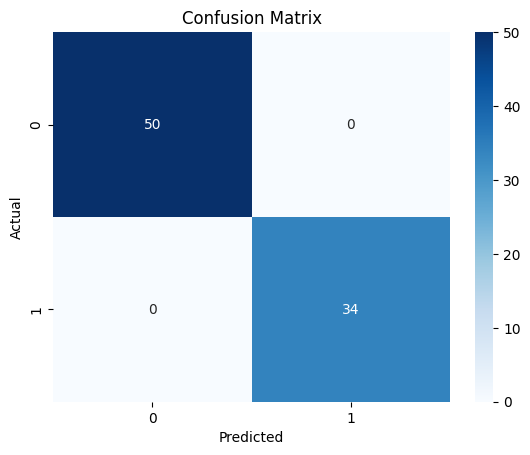

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

In this project, we used the Titanic dataset to build a machine learning model that predicts whether a passenger survived the Titanic disaster. This classic beginner project provided a comprehensive overview of the data analysis and modeling process. Here's a summary of the key steps and insights gained:

1. **Importing Required Libraries**: We imported essential libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn for data manipulation, visualization, and modeling.

2. **Loading and Inspecting the Data**: We loaded the Titanic dataset and examined its structure and contents. This initial inspection helped us understand the data and identify key features.

3. **Checking Data Types and Missing Values**: We checked the data types and identified missing values in various columns. This step was crucial for preparing the data for further analysis and modeling.

4. **Summary Statistics**: We generated summary statistics for both numerical and categorical columns. These statistics provided insights into the distribution and central tendency of the data.

5. **Exploratory Data Analysis (EDA)**:
   - **Univariate Analysis**: We visualized the distribution of numerical and categorical features using histograms and bar plots.
   - **Bivariate Analysis**: We explored relationships between features and the target variable using boxplots, count plots, and a correlation heatmap.
   - **Handling Missing Values**: We addressed missing values by imputing or dropping columns with too many missing values.
   - **Feature Engineering**: We created new features such as 'FamilySize' and 'IsAlone' to enhance the dataset.

6. **Data Preprocessing**: We prepared the data for machine learning by encoding categorical variables, scaling numerical features, and handling missing values. This step ensured that the data was in the right format for modeling.

7. **Splitting the Data**: We split the dataset into training and testing sets to evaluate the model's performance on unseen data.

8. **Model Building and Evaluation**: We built a RandomForestClassifier model and evaluated its performance using classification metrics such as accuracy, precision, recall, and the confusion matrix.

Through this project, we gained valuable experience in the end-to-end process of data analysis and machine learning, from data cleaning and visualization to feature engineering and model evaluation. The insights gained from EDA and the predictive power of the machine learning model demonstrated the importance of thorough data preparation and analysis in building effective predictive models.

By applying these techniques to the Titanic dataset, we not only enhanced our understanding of the factors that influenced passenger survival but also honed our skills in data science and machine learning, preparing us for more advanced projects in the future.